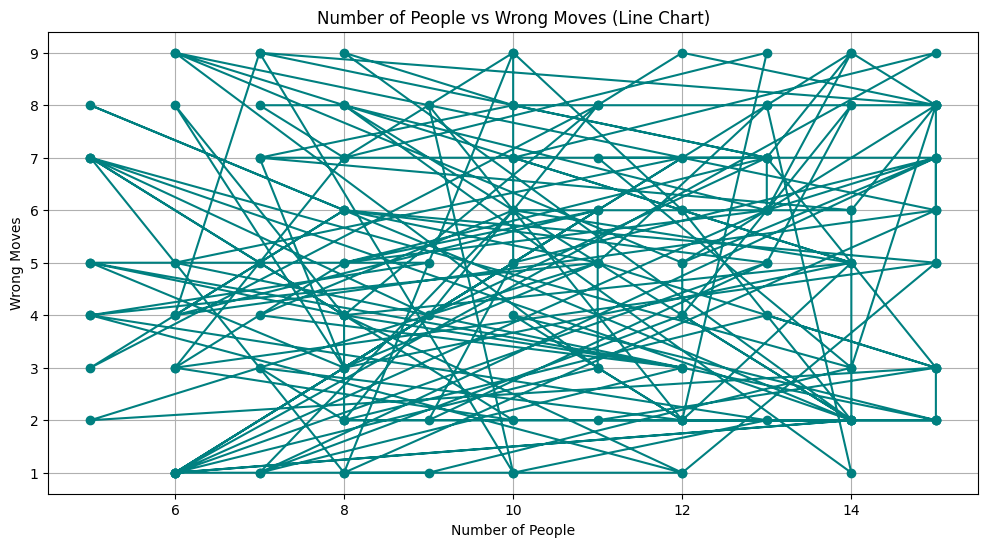

C:\Users\ashwi\AppData\Local\Temp\ipykernel_20032\723366952.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Number of People", y="Wrong Moves", data=data, palette="coolwarm")


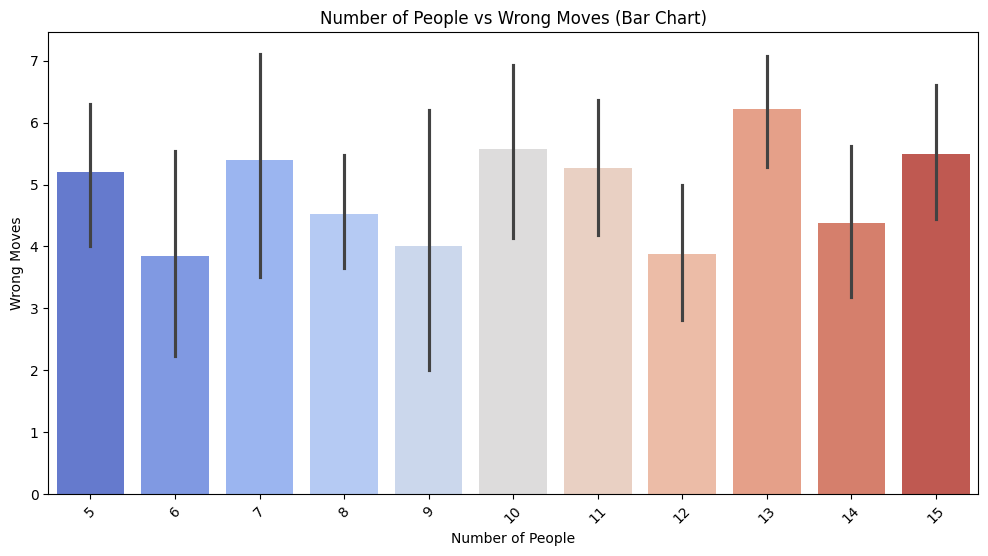

Model Evaluation Metrics:
Mean Absolute Error (MAE): 1.98
Mean Squared Error (MSE): 5.766666666666667
R² Score: 0.07018574786447285
Accuracy: 0.15333333333333332
F1 Score: 0.07896969696969695

Predictions for Next 10 Outcomes:
 Number of People  Predicted Wrong Moves
               12                      4
               14                      4
               13                      6
                7                      5
                9                      4
                8                      4
               10                      6
               13                      6
               11                      5
                5                      5


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, f1_score
import numpy as np


data = pd.read_csv("C:/Users/ashwi/Downloads/Josephus_data.csv")


plt.figure(figsize=(12, 6))
plt.plot(data["Number of People"], data["Wrong Moves"], marker='o', linestyle='-', color='teal')
plt.title("Number of People vs Wrong Moves (Line Chart)")
plt.xlabel("Number of People")
plt.ylabel("Wrong Moves")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Number of People", y="Wrong Moves", data=data, palette="coolwarm")
plt.title("Number of People vs Wrong Moves (Bar Chart)")
plt.xlabel("Number of People")
plt.ylabel("Wrong Moves")
plt.xticks(rotation=45)
plt.show()


X = data[["Number of People"]]
y = data["Wrong Moves"]


rf_model = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=15, min_samples_split=5)
rf_model.fit(X, y)


y_pred = rf_model.predict(X).round().astype(int)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

y_class = y.astype(int)
y_pred_class = y_pred.astype(int)
accuracy = accuracy_score(y_class, y_pred_class)
f1 = f1_score(y_class, y_pred_class, average='weighted')


print("Model Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Accuracy:", accuracy)
print("F1 Score:", f1)


future_people = np.random.randint(5, 16, size=10)
future_data = pd.DataFrame({"Number of People": future_people})


future_data["Predicted Wrong Moves"] = rf_model.predict(future_data).round().astype(int)


print("\nPredictions for Next 10 Outcomes:")
print(future_data.to_string(index=False))
